In [3]:
# 導入函式庫
import numpy as np  
from keras.models import Sequential
from keras.datasets import mnist
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.utils import np_utils  # 用來後續將 label 標籤轉為 one-hot-encoding  
from matplotlib import pyplot as plt

Using TensorFlow backend.


In [4]:
# 載入 MNIST 資料庫的訓練資料，並自動分為『訓練組』及『測試組』
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [5]:
# 建立簡單的線性執行的模型
model = Sequential()
# Add Input layer, 隱藏層(hidden layer) 有 256個輸出變數
model.add(Dense(units=256, input_dim=784, kernel_initializer='normal', activation='relu'))  #28*28 pixels
# Add output layer
model.add(Dense(units=10, kernel_initializer='normal', activation='softmax'))   #softmax != sigmoid 

In [6]:
# 編譯: 選擇損失函數、優化方法及成效衡量方式
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 

In [7]:
# 將 training 的 label 進行 one-hot encoding，例如數字 7 經過 One-hot encoding 轉換後是 0000001000，即第7個值為 1
y_TrainOneHot = np_utils.to_categorical(y_train) 
y_TestOneHot = np_utils.to_categorical(y_test) 

In [8]:
print(np.shape(X_train))

(60000, 28, 28)


In [13]:
# 將 training 的 input 資料轉為2維
X_train_2D = X_train.reshape(60000, 28*28).astype('float32')  
X_test_2D = X_test.reshape(10000, 28*28).astype('float32')  

X_train_2D[0]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

In [14]:
# Normalization
x_Train_norm = X_train_2D/255
x_Test_norm = X_test_2D/255

x_Test_norm[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [15]:
# 進行訓練, 訓練過程會存在 train_history 變數中
train_history = model.fit(x=x_Train_norm, y=y_TrainOneHot, validation_split=0.2, epochs=10, batch_size=800, verbose=2)
#batch_size最大訓練周其
#batch_size隨機抽樣樣本數

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 2s - loss: 0.8022 - acc: 0.8022 - val_loss: 0.3233 - val_acc: 0.9107
Epoch 2/10
 - 0s - loss: 0.2978 - acc: 0.9174 - val_loss: 0.2504 - val_acc: 0.9319
Epoch 3/10
 - 0s - loss: 0.2346 - acc: 0.9344 - val_loss: 0.2059 - val_acc: 0.9449
Epoch 4/10
 - 0s - loss: 0.1929 - acc: 0.9457 - val_loss: 0.1775 - val_acc: 0.9523
Epoch 5/10
 - 0s - loss: 0.1651 - acc: 0.9531 - val_loss: 0.1602 - val_acc: 0.9563
Epoch 6/10
 - 0s - loss: 0.1422 - acc: 0.9606 - val_loss: 0.1470 - val_acc: 0.9588
Epoch 7/10
 - 0s - loss: 0.1250 - acc: 0.9651 - val_loss: 0.1338 - val_acc: 0.9606
Epoch 8/10
 - 0s - loss: 0.1105 - acc: 0.9700 - val_loss: 0.1259 - val_acc: 0.9646
Epoch 9/10
 - 0s - loss: 0.0994 - acc: 0.9724 - val_loss: 0.1185 - val_acc: 0.9661
Epoch 10/10
 - 0s - loss: 0.0887 - acc: 0.9755 - val_loss: 0.1158 - val_acc: 0.9666


In [16]:
# 顯示訓練成果(分數)
scores = model.evaluate(x_Test_norm, y_TestOneHot)  
print()  
print("\t[Info] Accuracy of testing data = {:2.1f}%".format(scores[1]*100.0))  


10000/10000 [==============================] - 0s 31us/step

	[Info] Accuracy of testing data = 96.7%


In [17]:
# 預測(prediction)
X = x_Test_norm[0:10,:]
predictions = model.predict_classes(X)
# get prediction result
print(predictions)

[7 2 1 0 4 1 4 9 6 9]


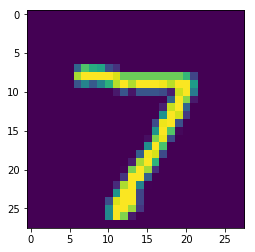

In [18]:
# 顯示 第一筆訓練資料的圖形，確認是否正確
plt.imshow(X_test[0])
plt.show()

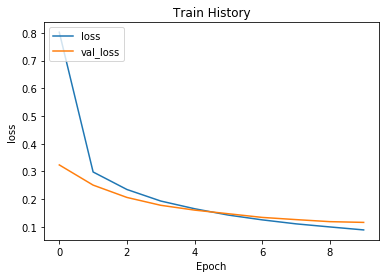

In [19]:
#看優化過程
plt.plot(train_history.history['loss'])  
plt.plot(train_history.history['val_loss'])  
plt.title('Train History')  
plt.ylabel('loss')  
plt.xlabel('Epoch')  
plt.legend(['loss', 'val_loss'], loc='upper left')  
plt.show() 